In [5]:
from ultralytics import YOLO
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CocoDetection
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import torch.nn as nn
from torchvision.models import resnet18
from torch.utils.data import Dataset
from PIL import Image
import json
import torchvision.transforms.v2 as T 
from torchvision.models.detection.backbone_utils import BackboneWithFPN
from torchvision.models.detection import FasterRCNN
import torch.nn.functional as F
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2 
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import matplotlib.pyplot as plt
import time

In [6]:
names=[
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
  ]

### One Stage Model

In [3]:
# Load a YOLOv8 model (you can also use 'yolov8s.pt', 'yolov8m.pt', etc.)
model = YOLO('yolo11n.pt')  # or 'yolov8s.pt', 'yolov8m.pt', etc.
model.train(
    data='data.yaml',  # path to your data.yaml
    epochs=100
    imgsz=640,
    batch=16,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.220 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.12.6 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797658c70d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.02

results_dict: {'metrics/precision(B)': 0.8571999447197384, 'metrics/recall(B)': 0.8359195543365742, 'metrics/mAP50(B)': 0.8939113393410482, 'metrics/mAP50-95(B)': 0.7428123612338415, 'fitness': 0.7428123612338415}

result already provide by ultralytics

In [7]:
model = YOLO('runs/detect/train3/weights/best.pt')  



0: 640x544 1 sink, 17.8ms
Speed: 2.9ms preprocess, 17.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 544)


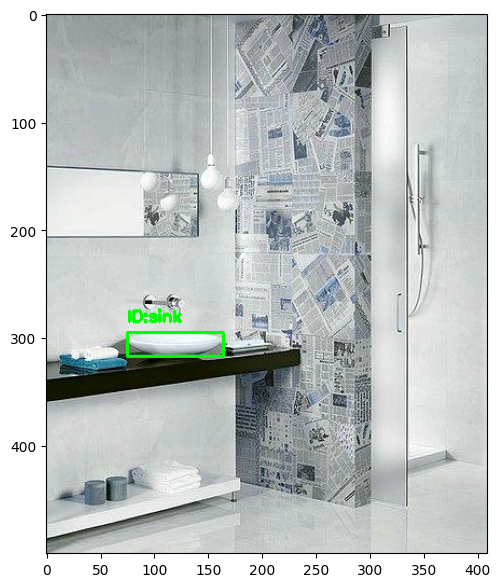

In [10]:
img = cv2.imread('coco128/images/val2017/000000000590.jpg')
# start = time.time()
result = model.predict(img)
# end = time.time()
# fps = end - start 
# print(f'speed: {fps}')
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.figure(figsize=(12,7))
plt.imshow(img)


0: 448x640 1 potted plant, 1 sink, 1 clock, 106.7ms
Speed: 4.4ms preprocess, 106.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


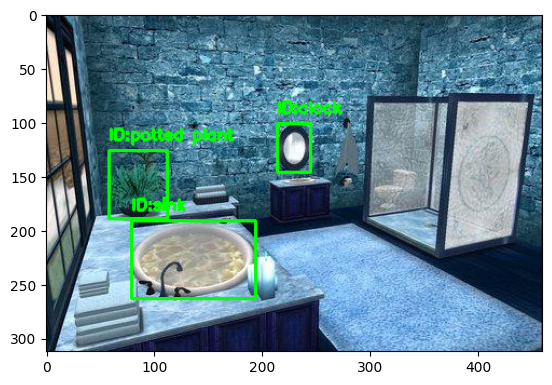

In [64]:
img = cv2.imread('coco128/images/val2017/000000000560.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

# Clock is wrong class but shape it likely to be clock that why model think it will be clock 


0: 448x640 1 motorcycle, 13.6ms
Speed: 2.3ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


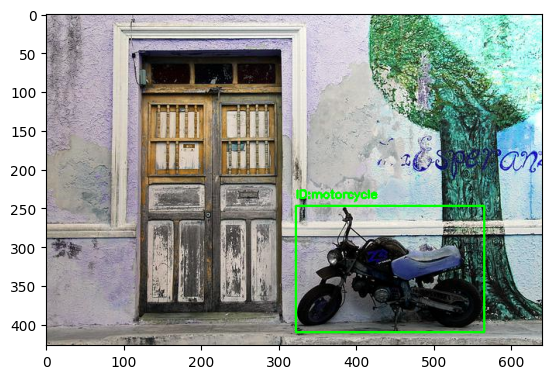

In [66]:
img = cv2.imread('coco128/images/val2017/000000000629.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)


0: 448x640 1 car, 1 cat, 21.4ms
Speed: 2.5ms preprocess, 21.4ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


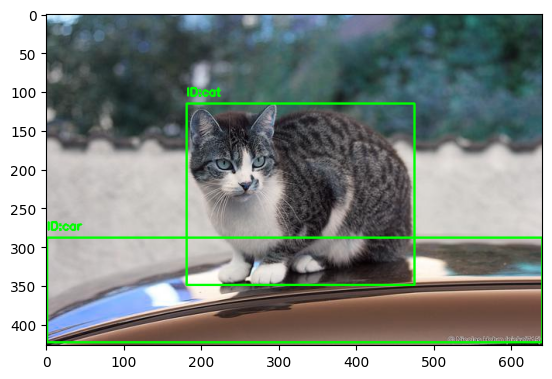

In [67]:
img = cv2.imread('coco128/images/val2017/000000000650.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)


0: 448x640 1 airplane, 21.3ms
Speed: 3.3ms preprocess, 21.3ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


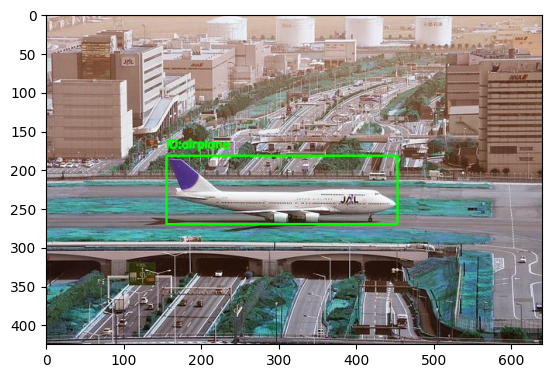

In [68]:
img = cv2.imread('coco128/images/val2017/000000000540.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

In [11]:
total_params = 0
for param in model.parameters():
    total_params += param.numel() 
print(f'Model size :{total_params}')


Model size :2616248


In [12]:
!nvidia-smi

Sun Oct 26 08:46:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:84:00.0 Off |                  N/A |
| 26%   42C    P8             27W /  250W |     306MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
class ConvBlock(nn.Module):
    def __init__(self, c_in, kernel, stride, padding):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(c_in, c_in, kernel, stride, padding, bias=False),
            nn.BatchNorm2d(c_in),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(c_in, c_in, kernel, stride, padding, bias=False),
            nn.BatchNorm2d(c_in),
        )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.conv2(out) # <-- FIX: Use 'out' from conv1
        out = F.relu(out + identity) # Add the skip connection
        return out

class DownBlock(nn.Module):
    def __init__(self, c_in, c_out, kernel, stride, padding):
        super().__init__()
        
        # This layer handles the downsampling and channel change
        self.downconv = nn.Sequential(
            nn.Conv2d(c_in, c_out, kernel, 2, padding, bias=False), # Hard-coded stride=2
            nn.BatchNorm2d(c_out),
            nn.ReLU()
        )
        
        # This is the residual block *after* downsampling
        self.conv_block = ConvBlock(c_out, kernel, stride, padding)

    def forward(self, x):
        x = self.downconv(x)
        x = self.conv_block(x) # Apply a standard ConvBlock
        return x

class MiniRestNetBackbone(nn.Module):
    def __init__(self, c_in, unit=[16, 32, 64]):
        super().__init__()
        self.preBlock = nn.Conv2d(c_in, unit[0], kernel_size=3, stride=1, padding=1)
        
        # body_layer1 has 16 out_channels
        self.body_layer1 = nn.Sequential(
            ConvBlock(unit[0], 3, 1, 1),
            ConvBlock(unit[0], 3, 1, 1)
        ) 
        
        # body_layer2 has 32 out_channels
        self.body_layer2 = nn.Sequential(
            DownBlock(unit[0], unit[1], 3, 1, 1), # 16-in, 32-out
            ConvBlock(unit[1], 3, 1, 1)
        ) 
            
        # body_layer3 has 64 out_channels
        self.body_layer3 = nn.Sequential(
            DownBlock(unit[1], unit[2], 3, 1, 1), # 32-in, 64-out
            ConvBlock(unit[2], 3, 1, 1)
        ) 

    def forward(self, x):
        outputs = {}
        x = self.preBlock(x)
        
        x = self.body_layer1(x)
        outputs['0'] = x  # FPN layer 1 (16 channels)
        
        x = self.body_layer2(x)
        outputs['1'] = x  # FPN layer 2 (32 channels)
        
        x = self.body_layer3(x)
        outputs['2'] = x  # FPN layer 3 (64 channels)
        
        return outputs

In [4]:
class CustomCocoDataset(Dataset):
    def __init__(self, img_dir, ann_file, transforms=None):
        self.img_dir = img_dir
        self.transforms = transforms
        with open(ann_file, 'r') as f:
            self.coco_data = json.load(f)

        self.images = {img['id']: img for img in self.coco_data['images']}
        self.annotations = {}
        for ann in self.coco_data['annotations']:
            img_id = ann['image_id']
            if img_id not in self.annotations:
                self.annotations[img_id] = []
            self.annotations[img_id].append(ann)
            
        self.ids = list(self.images.keys())
        
        # Get all unique category IDs
        self.category_ids = {cat['id'] for cat in self.coco_data['categories']}
        # +1 for the __background__ class
        self.num_classes = len(self.category_ids) + 1 

    def __len__(self):
        return len(self.ids)
        
    def get_num_classes(self):
        # This is the new helper function
        return self.num_classes

    def __getitem__(self, idx):
        # ... (Your __getitem__ logic is correct and stays the same) ...
        img_id = self.ids[idx]
        img_info = self.images[img_id]
        img_path = os.path.join(self.img_dir, img_info['file_name'])
        img = Image.open(img_path).convert("RGB")

        annos = self.annotations.get(img_id, [])
        boxes = []
        labels = []
        areas = []
        iscrowd = []
        
        for anno in annos:
            xmin, ymin, w, h = anno['bbox']
            boxes.append([xmin, ymin, xmin + w, ymin + h])
            labels.append(anno['category_id'])
            areas.append(anno.get('area', w * h))
            iscrowd.append(anno.get('iscrowd', 0))

        if len(boxes) > 0:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
            areas = torch.as_tensor(areas, dtype=torch.float32)
            iscrowd = torch.as_tensor(iscrowd, dtype=torch.int64)
        else:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
            areas = torch.zeros((0,), dtype=torch.float32)
            iscrowd = torch.zeros((0,), dtype=torch.int64)

        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': torch.tensor([img_id]),
            'area': areas,
            'iscrowd': iscrowd
        }

        if self.transforms:
            img, target = self.transforms(img, target) 

        return img, target

In [5]:

def get_transform(train):
    """
    Defines the v2 transformations for a SINGLE image.
    """
    transforms = []
    
    # Resize must be first
    transforms.append(T.Resize((640, 640))) 
    
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
        transforms.append(T.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1))

    # Convert to tensor and scale to [0, 1]
    transforms.append(T.ToImage())
    transforms.append(T.ToDtype(torch.float32, scale=True))
    
    return T.Compose(transforms)

def collate_fn(batch):
    return tuple(zip(*batch))

def get_model_instance(num_classes):

    backbone_model = torchvision.models.resnet18(weights="DEFAULT")

    return_layers = {'layer1': '0', 'layer2': '1', 'layer3': '2', 'layer4': '3'}
    in_channels_list = [64, 128, 256, 512]
    out_channels = 256

    # 5. Create the FPN-enabled backbone
    backbone = BackboneWithFPN(backbone_model, 
                               return_layers, 
                               in_channels_list, 
                               out_channels)
    model = FasterRCNN(backbone, num_classes=num_classes)
    
    return model

TRAIN_IMG_DIR = "coco128_convert/images/train2017"
TRAIN_ANN_FILE = "coco128_convert/annotations/instances_train2017.json"
VAL_IMG_DIR = "coco128_convert/images/val2017"
VAL_ANN_FILE = "coco128_convert/annotations/instances_val2017.json"

train_dataset = CustomCocoDataset(
    img_dir=TRAIN_IMG_DIR,
    ann_file=TRAIN_ANN_FILE,
    transforms=get_transform(train=True) 
)

val_dataset = CustomCocoDataset(
    img_dir=VAL_IMG_DIR,
    ann_file=VAL_ANN_FILE,
    transforms=get_transform(train=False) 
)
trainLoader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
valLoader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)



In [6]:
num_classes = 81 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = get_model_instance(num_classes)
model.to(device)

# Optimizer and Scheduler (your code was correct)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params, lr=0.001)
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [6]:
num_epochs = 300
SAVE_PATH = "fasterrcnn_resnet18_test.pth" 
best_val_loss = float('inf') 

for epoch in range(num_epochs):
    model.train() # Set model to training mode
    total_train_loss = 0

    # Training phase
    for images, targets in trainLoader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_train_loss += losses.item()

    # Update learning rate
    # lr_scheduler.step()

    # Calculate average training loss
    avg_train_loss = total_train_loss / len(trainLoader)
    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {avg_train_loss:.4f}")

    # --- Validation Loop ---
    
    # FIX 2: Set model to train() to get losses, but use torch.no_grad()
    # to disable gradient calculation.
    model.train() 
    total_val_loss = 0
    
    with torch.no_grad(): # Disables gradient calculation
        for images, targets in valLoader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # We are in no_grad() context, so model(images, targets)
            # will return losses but not build a computation graph.
            loss_dict = model(images, targets)
            
            # FIX 3: Sum losses correctly, just like in training
            losses = sum(loss for loss in loss_dict.values())
            total_val_loss += losses.item()

    # Calculate average validation loss
    avg_val_loss = total_val_loss / len(valLoader)
    print(f"Epoch [{epoch+1}/{num_epochs}] | Val Loss: {avg_val_loss:.4f}")
    if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), SAVE_PATH)
            print(f"  -> New best model saved to {SAVE_PATH} (Val Loss: {avg_val_loss:.4f})")

# print("--- Training Finished ---")
# torch.save(model.state_dict(), "fasterrcnn_resnet18_coco128.pth")

Epoch [1/300] | Train Loss: 2.0796
Epoch [1/300] | Val Loss: 1.1690
  -> New best model saved to fasterrcnn_resnet18_test.pth (Val Loss: 1.1690)
Epoch [2/300] | Train Loss: 1.3439
Epoch [2/300] | Val Loss: 1.0135
  -> New best model saved to fasterrcnn_resnet18_test.pth (Val Loss: 1.0135)
Epoch [3/300] | Train Loss: 1.7798
Epoch [3/300] | Val Loss: 1.0317
Epoch [4/300] | Train Loss: 1.3543
Epoch [4/300] | Val Loss: 0.8909
  -> New best model saved to fasterrcnn_resnet18_test.pth (Val Loss: 0.8909)
Epoch [5/300] | Train Loss: 1.2639
Epoch [5/300] | Val Loss: 0.9557
Epoch [6/300] | Train Loss: 1.2760
Epoch [6/300] | Val Loss: 1.0313
Epoch [7/300] | Train Loss: 1.2232
Epoch [7/300] | Val Loss: 0.9256
Epoch [8/300] | Train Loss: 1.1967
Epoch [8/300] | Val Loss: 0.9239
Epoch [9/300] | Train Loss: 1.1975
Epoch [9/300] | Val Loss: 0.9196
Epoch [10/300] | Train Loss: 1.1413
Epoch [10/300] | Val Loss: 0.9591
Epoch [11/300] | Train Loss: 1.1550
Epoch [11/300] | Val Loss: 0.9787
Epoch [12/300] | 

In [37]:
num_classes = 81 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = get_model_instance(num_classes)
model.load_state_dict(torch.load("fasterrcnn_resnet18_best.pth", map_location="cuda"))

model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentu

In [51]:

# Assume model, valLoader, and device are defined

# 1. Initialize the metric
# Make sure to move the metric itself to the device!
metric = MeanAveragePrecision().to(device) 
# 2. Set model to evaluation mode
model.eval()

# 3. Disable gradient calculation
with torch.no_grad():

    for images, targets in valLoader:
        
        # 5. Move images and targets to the correct device
        images = [img.to(device) for img in images]
        # --- THIS IS THE MISSING STEP ---
        # Targets must also be on the same device as the model/predictions
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # 6. Get model predictions
        predictions = model(images)

        # 7. Update the metric
        # --- THIS IS THE CORRECTED LINE ---
        # Use the correct variable 'predictions'
        metric.update(predictions, targets)
# --- End of inference loop ---

# 8. Compute the final mAP scores
print("Calculating final mAP...")
map_results = metric.compute()

print("\nValidation Results:")
print(map_results)

Calculating final mAP...

Validation Results:
{'map': tensor(0.), 'map_50': tensor(0.), 'map_75': tensor(0.), 'map_small': tensor(0.), 'map_medium': tensor(0.), 'map_large': tensor(0.), 'mar_1': tensor(0.), 'mar_10': tensor(0.), 'mar_100': tensor(0.), 'mar_small': tensor(0.), 'mar_medium': tensor(0.), 'mar_large': tensor(0.), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 1,  2,  3,  4,  6, 14, 16, 17, 21, 29, 30, 33, 34, 35, 36, 37, 39, 40, 42, 45, 46, 51, 52, 54, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 72, 73, 74, 75, 78, 80], dtype=torch.int32)}


## it seams like my model overfitting, it maybe because I use small data that is 100 image for training maybe FastRCNN can not capture it well.

In [25]:
import numpy as np
import time

In [19]:
temp = iter(valLoader)

Speed: 0.11 FPS


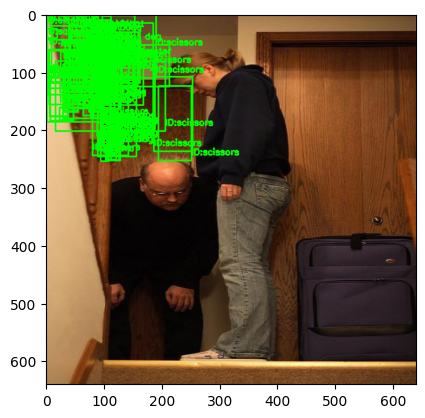

In [28]:
all_predictions = []
all_targets = []

# 1. Set model to evaluation mode (important!)
model.eval()
model.roi_heads.score_thresh = 0.01
# 2. Disable gradient calculation
with torch.no_grad():
    img, target = next(temp)
    images = [img.to(device) for img in img]
    start = time.time()
    predictions = model(images)
    end = time.time()
fps = end - start
print(f"Speed: {fps:.2f} FPS")
img = torch.permute(img[0],(1,2,0))
box = predictions[0]['boxes'].cpu().numpy().astype(np.uint8)
labels = predictions[0]['labels'].cpu().numpy().astype(np.uint8)
img = img.numpy()*255
img = img.astype(np.uint8)
for box, label in zip(box, labels):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

Speed: 0.09 FPS


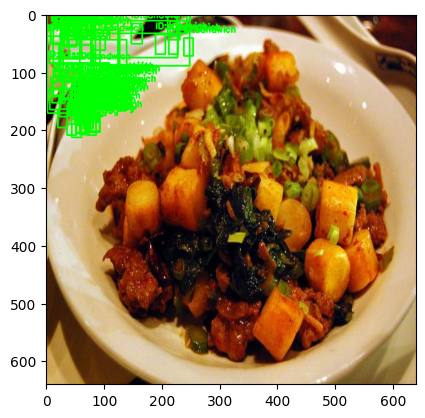

In [31]:
all_predictions = []
all_targets = []

# 1. Set model to evaluation mode (important!)
model.eval()
model.roi_heads.score_thresh = 0.01
# 2. Disable gradient calculation
with torch.no_grad():
    img, target = next(temp)
    images = [img.to(device) for img in img]
    start = time.time()
    predictions = model(images)
    end = time.time()
fps = end - start
print(f"Speed: {fps:.2f} FPS")
img = torch.permute(img[0],(1,2,0))
box = predictions[0]['boxes'].cpu().numpy().astype(np.uint8)
labels = predictions[0]['labels'].cpu().numpy().astype(np.uint8)
img = img.numpy()*255
img = img.astype(np.uint8)
for box, label in zip(box, labels):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

Speed: 0.10 FPS


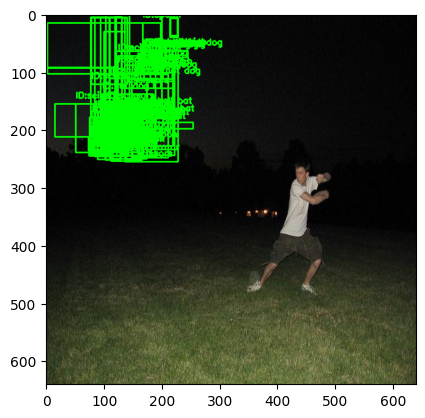

In [32]:
all_predictions = []
all_targets = []

# 1. Set model to evaluation mode (important!)
model.eval()
model.roi_heads.score_thresh = 0.01
# 2. Disable gradient calculation
with torch.no_grad():
    img, target = next(temp)
    images = [img.to(device) for img in img]
    start = time.time()
    predictions = model(images)
    end = time.time()
fps = end - start
print(f"Speed: {fps:.2f} FPS")
img = torch.permute(img[0],(1,2,0))
box = predictions[0]['boxes'].cpu().numpy().astype(np.uint8)
labels = predictions[0]['labels'].cpu().numpy().astype(np.uint8)
img = img.numpy()*255
img = img.astype(np.uint8)
for box, label in zip(box, labels):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

Speed: 0.09 FPS


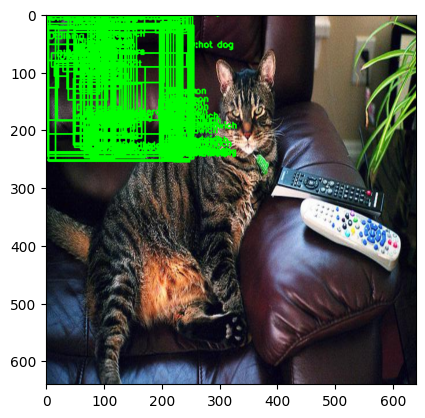

In [36]:
all_predictions = []
all_targets = []

# 1. Set model to evaluation mode (important!)
model.eval()
model.roi_heads.score_thresh = 0.01
# 2. Disable gradient calculation
with torch.no_grad():
    img, target = next(temp)
    images = [img.to(device) for img in img]
    start = time.time()
    predictions = model(images)
    end = time.time()
fps = end - start
print(f"Speed: {fps:.2f} FPS")
img = torch.permute(img[0],(1,2,0))
box = predictions[0]['boxes'].cpu().numpy().astype(np.uint8)
labels = predictions[0]['labels'].cpu().numpy().astype(np.uint8)
img = img.numpy()*255
img = img.astype(np.uint8)
for box, label in zip(box, labels):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

Speed: 0.04 FPS


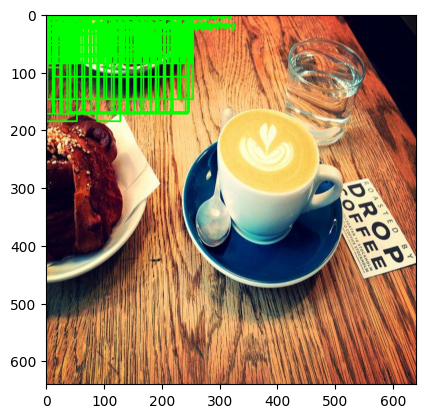

In [38]:
all_predictions = []
all_targets = []

# 1. Set model to evaluation mode (important!)
model.eval()
model.roi_heads.score_thresh = 0.01
# 2. Disable gradient calculation
with torch.no_grad():
    img, target = next(temp)
    images = [img.to(device) for img in img]
    start = time.time()
    predictions = model(images)
    end = time.time()
fps = end - start
print(f"Speed: {fps:.2f} FPS")
img = torch.permute(img[0],(1,2,0))
box = predictions[0]['boxes'].cpu().numpy().astype(np.uint8)
labels = predictions[0]['labels'].cpu().numpy().astype(np.uint8)
img = img.numpy()*255
img = img.astype(np.uint8)
for box, label in zip(box, labels):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

In [41]:
total_params = 0
for param in model.parameters():
    total_params += param.numel() 
print(f'Model size :{total_params}')


Model size :28688356


In [42]:
!nvidia-smi

Sun Oct 26 08:43:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:84:00.0 Off |                  N/A |
| 28%   42C    P8             26W /  250W |     796MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

YOLOv11 use less memory and small model and better mAP